# DSC 540 Week 3-4 Assignments

Logan Quandt

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

#  Data Wrangling with Python: Activity 5, page 116

In [2]:
#load in dataframes and check first 10 records
df = pd.read_csv('Boston_housing.csv')
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [26]:
#total number of records
df.shape

(506, 14)

In [4]:
#create new dataframe dropping CHAS, NOX, B and LSTAT columns
df_two = df[['CRIM', 'ZN','INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'PRICE']]
df_two.tail(7)

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,PRICE
499,0.17783,0.0,9.69,5.569,73.5,2.3999,6,391,19.2,17.5
500,0.22438,0.0,9.69,6.027,79.7,2.4982,6,391,19.2,16.8
501,0.06263,0.0,11.93,6.593,69.1,2.4786,1,273,21.0,22.4
502,0.04527,0.0,11.93,6.120,76.7,2.2875,1,273,21.0,20.6
503,0.06076,0.0,11.93,6.976,91.0,2.1675,1,273,21.0,23.9
504,0.10959,0.0,11.93,6.794,89.3,2.3889,1,273,21.0,22.0
505,0.04741,0.0,11.93,6.030,80.8,2.5050,1,273,21.0,11.9


In [6]:
#just another way to create the new dataframe
df_three = df.drop(['CHAS','NOX','B','LSTAT'], axis = 1)
df_three.tail(7)

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,PRICE
499,0.17783,0.0,9.69,5.569,73.5,2.3999,6,391,19.2,17.5
500,0.22438,0.0,9.69,6.027,79.7,2.4982,6,391,19.2,16.8
501,0.06263,0.0,11.93,6.593,69.1,2.4786,1,273,21.0,22.4
502,0.04527,0.0,11.93,6.120,76.7,2.2875,1,273,21.0,20.6
503,0.06076,0.0,11.93,6.976,91.0,2.1675,1,273,21.0,23.9
504,0.10959,0.0,11.93,6.794,89.3,2.3889,1,273,21.0,22.0
505,0.04741,0.0,11.93,6.030,80.8,2.5050,1,273,21.0,11.9


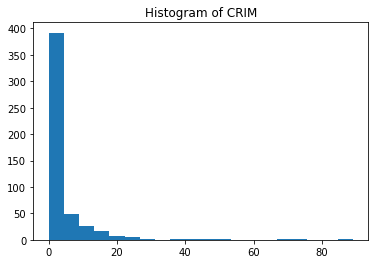

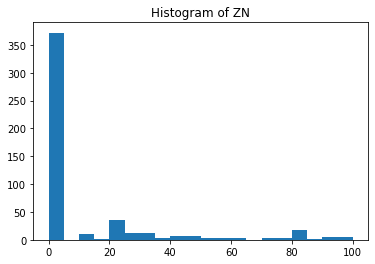

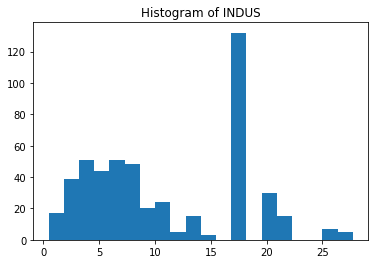

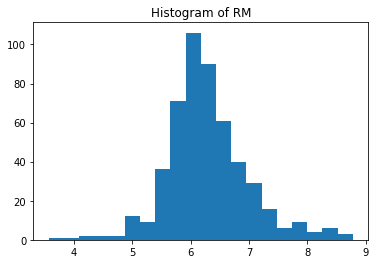

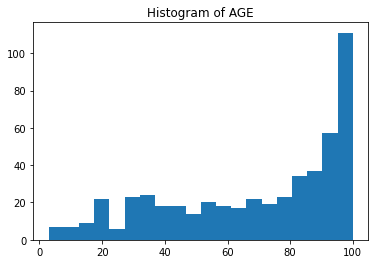

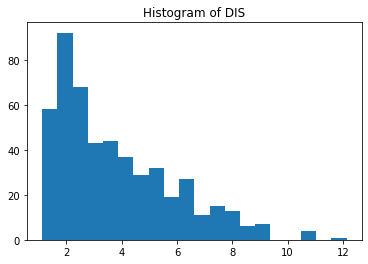

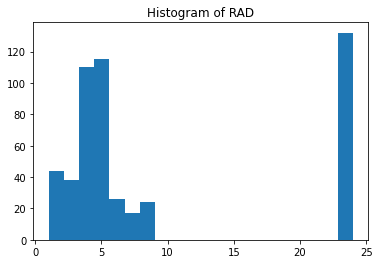

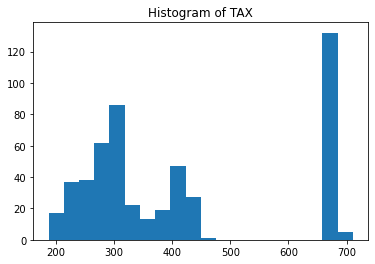

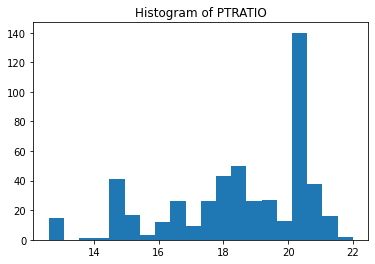

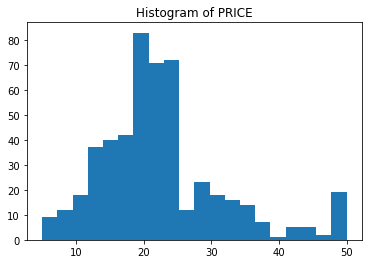

In [14]:
#plot histograms of all the columns at once providing a unique title to each
for c in df_two.columns:
    plt.title('Histogram of '+c)
    plt.hist(df_two[c], bins = 20)
    plt.show()

<AxesSubplot:xlabel='CRIM'>

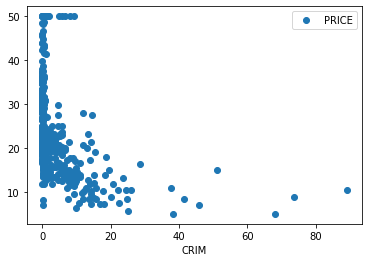

In [29]:
#first way to scatterplot
df_two.plot('CRIM', 'PRICE', style='o')

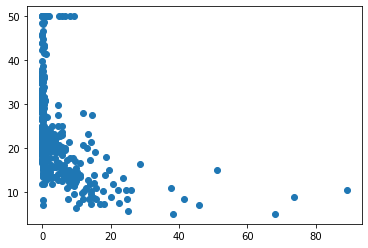

In [31]:
#scatterplot using matplotlib
plt.scatter(df_two['CRIM'], df_two['PRICE'])
plt.show()

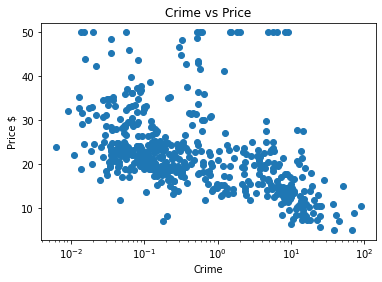

In [25]:
#scatterplot using log scale for Crime, I read in the book I could've also used np.log10 when inputting the arguments for scatter() method.
figure = plt.figure()
ax = figure.gca()
ax.scatter(df_two['CRIM'], df_two['PRICE'])
ax.set_title('Crime vs Price')
ax.set_xlabel('Crime')
ax.set_ylabel('Price $')
ax.set_xscale('log')

In [33]:
#mean rooms per dwelling
df_two['RM'].mean()

6.284634387351787

In [34]:
#calculate median age
df_two['AGE'].median()

77.5

In [38]:
#calculate distance to boston employment centers
df_two['DIS'].mean()

3.795042687747034

In [48]:
#calculate percentage of houses under 20k, It turned low_price into a numpy array where True = 1 and false = 0 so I was able to find the mean then multiply by 100 to get the percentage
low_price = df['PRICE'] < 20
high_price = df['PRICE'] >= 20
low_price.mean()*100

41.50197628458498

# Data Wrangling with Python: Activity 6, page 171

In [80]:
#load in data and ensure it came in correctly
income_df = pd.read_csv('adult_income_data.csv')
income_df.head(10)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,80,United-States,>50K


In [81]:
#read text file line by line

names = []
with open('adult_income_names.txt','r') as first_line:
    for line in first_line:
        first_line.readline()
        h = line.split(':')[0]
        names.append(h)

names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

In [82]:
#append income to names
names.append('Income')
names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'Income']

In [84]:
#load in dataframe with column names replaced by names read from txt file
income_df_two = pd.read_csv('adult_income_data.csv', names=names)
income_df_two.head(25)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,5178,0,40,United-States,>50K


In [85]:
#check for null values
income_df_two.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
Income            False
dtype: bool

In [86]:
#check for na values
income_df_two.isna().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
Income            False
dtype: bool

In [108]:
#create dataframe with only age, education and occupation
income_df_three = income_df_two[['age','education','occupation']]
income_df_three.head()

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


<AxesSubplot:>

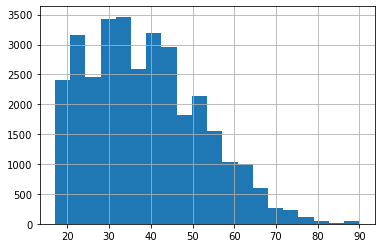

In [88]:
#create histogram of age with 20 bins
income_df_three['age'].hist(bins = 20)

In [90]:
#create function to strip whitespace
def strip_whitespace(string):
    return string.strip()

In [97]:
#apply strip_whitespace function to categorical column education
income_df_three['education_stripped'] = income_df_three['education'].apply(strip_whitespace)
income_df_three['education'] = income_df_three['education_stripped']

C:\Users\logan\AppData\Local\Temp/ipykernel_22292/1310071072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_df_three['education_stripped'] = income_df_three['education'].apply(strip_whitespace)
C:\Users\logan\AppData\Local\Temp/ipykernel_22292/1310071072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_df_three['education'] = income_df_three['education_stripped']


In [99]:
#apply strip_whitespace function to categorical column occupation
income_df_three['occupation_stripped'] = income_df_three['occupation'].apply(strip_whitespace)
income_df_three['occupation'] = income_df_three['occupation_stripped']
income_df_three.drop(labels=['occupation_stripped','education_stripped'], axis=1)

C:\Users\logan\AppData\Local\Temp/ipykernel_22292/4118280748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_df_three['occupation_stripped'] = income_df_three['occupation'].apply(strip_whitespace)
C:\Users\logan\AppData\Local\Temp/ipykernel_22292/4118280748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_df_three['occupation'] = income_df_three['occupation_stripped']


,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty
...,...,...,...
32556,27,Assoc-acdm,Tech-support
32557,40,HS-grad,Machine-op-inspct
32558,58,HS-grad,Adm-clerical
32559,22,HS-grad,Adm-clerical


In [104]:
#filter df to find people aged between 30 and 50
income_df_filtered = income_df_three[(income_df_three['age'] >= 30) & (income_df_three['age'] <= 50)]
income_df_filtered.head(20)

,age,education,occupation,education_stripped,occupation_stripped
0,39,Bachelors,Adm-clerical,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners,HS-grad,Handlers-cleaners
5,37,Masters,Exec-managerial,Masters,Exec-managerial
6,49,9th,Other-service,9th,Other-service
8,31,Masters,Prof-specialty,Masters,Prof-specialty
9,42,Bachelors,Exec-managerial,Bachelors,Exec-managerial
10,37,Some-college,Exec-managerial,Some-college,Exec-managerial
11,30,Bachelors,Prof-specialty,Bachelors,Prof-specialty
13,32,Assoc-acdm,Sales,Assoc-acdm,Sales


In [106]:
#calculate count of people aged 30-50
income_df_filtered.shape #number of people aged between 30 and 50, could've also used count() but did not like the format of it

(16390, 5)

In [117]:
#group by education and look at distribution of age
income_df_education = income_df_three.groupby(['education'])
income_df_education.describe()['age']

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,933.0,37.429796,16.720713,17.0,22.00,34.0,52.0,90.0
11th,1175.0,32.355745,15.545485,17.0,18.00,28.0,43.0,90.0
12th,433.0,32.000000,14.334625,17.0,19.00,28.0,41.0,79.0
1st-4th,168.0,46.142857,15.615625,19.0,33.00,46.0,57.0,90.0
5th-6th,333.0,42.885886,15.557285,17.0,29.00,42.0,54.0,84.0
7th-8th,646.0,48.445820,16.092350,17.0,34.25,50.0,61.0,90.0
9th,514.0,41.060311,15.946862,17.0,28.00,39.0,54.0,90.0
Assoc-acdm,1067.0,37.381443,11.095177,19.0,29.00,36.0,44.0,90.0
Assoc-voc,1382.0,38.553546,11.631300,19.0,30.00,37.0,46.0,84.0


In [118]:
#Group by occupation and show summary statistics of age
income_df_occupation = income_df_three.groupby(['occupation'])
income_df_occupation.describe()['age']

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,1843.0,40.882800,20.336350,17.0,21.0,35.0,61.0,90.0
Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
Armed-Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft-repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming-fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers-cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine-op-inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other-service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0


On average, Exec-managerial as the oldest workers with a mean age of 42.16

In [119]:
#find 75th percentile of age
income_df_two.describe()['age']

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

Age 48 is the 75th percentile

In [120]:
#filter to find occupation with biggest share of people over 48
income_df_overforty = income_df_three[(income_df_three['age'] >= 48)]
income_df_overforty_filtered = income_df_overforty.groupby(['occupation'])
income_df_overforty_filtered.describe()['age']

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,722.0,64.038781,8.470305,48.0,59.0,64.0,69.0,90.0
Adm-clerical,810.0,56.880247,7.540856,48.0,51.0,55.0,61.0,90.0
Craft-repair,992.0,55.128024,6.097157,48.0,50.0,54.0,59.0,90.0
Exec-managerial,1262.0,56.256735,7.562629,48.0,51.0,54.0,60.0,90.0
Farming-fishing,322.0,59.375776,8.041855,48.0,53.0,58.0,64.0,90.0
Handlers-cleaners,180.0,56.244444,7.651357,48.0,50.0,55.0,61.0,90.0
Machine-op-inspct,433.0,55.267898,6.590700,48.0,50.0,54.0,59.0,90.0
Other-service,672.0,57.944940,7.928045,48.0,52.0,57.0,62.0,90.0
Priv-house-serv,55.0,62.690909,9.093898,48.0,54.5,62.0,70.0,81.0


According to the table above, Exec-managerial has the largest share of workers over the 75th percentile

In [123]:
#create variable for boxplot to filter 
box_plot_var = income_df_three.groupby(['occupation']).describe()['age']

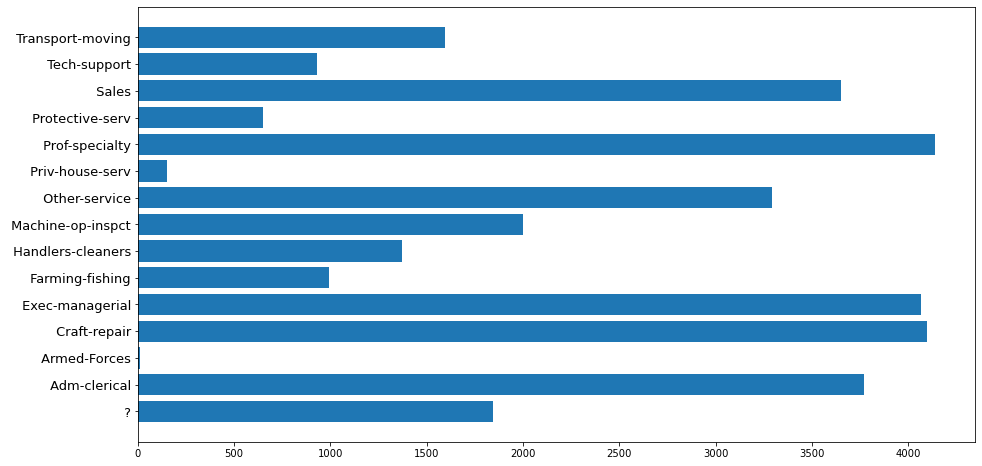

In [124]:
#create bar chart
plt.figure(figsize = (15,8))
plt.barh(y = box_plot_var.index, width = box_plot_var['count'])
plt.yticks(fontsize = 13)
plt.show()

According to the bar chart, armed forces are a clear outlier as they have insignificant data.

In [128]:
#create sample dataframe one with random sample to merge
merge_df_one = income_df_two[['age','occupation']].sample(5,random_state=101)

In [129]:
#create sample dataframe one with random sample to merge
merge_df_two = income_df_two[['education', 'occupation']].sample(5,random_state=101)

In [130]:
#merge Dataframes on common key
merge_df_merged = pd.merge(merge_df_one, merge_df_two, on='occupation', how = 'inner').drop_duplicates()
merge_df_merged.head()

,age,occupation,education
0,51,Machine-op-inspct,HS-grad
1,19,Sales,11th
2,40,Exec-managerial,HS-grad
3,17,Handlers-cleaners,10th
4,61,Craft-repair,7th-8th


# Create a series and practice basic arithmetic steps

In [141]:
#create series one with index
labels_one = ['a','c','d','e']
series_one = pd.Series([7.3, -2.5, 3.4, 1.5], index = labels_one)
series_one

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [142]:
#create series two with index
labels_two = ['a','c','e','f','g']
series_two = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=labels_two)
series_two

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [148]:
#add two series together, used reset_index to fix errors with index
series_one.reset_index(drop=True) + series_two.reset_index(drop=True)

0    5.2
1    1.1
2    1.9
3    5.5
4    NaN
dtype: float64

In [149]:
#subtract two series, use reset_index to fix errors with index
series_one.reset_index(drop=True) - series_two.reset_index(drop=True)

0    9.4
1   -6.1
2    4.9
3   -2.5
4    NaN
dtype: float64